In [1]:
import sys
#import os
#import numpy
#import pandas as pd
#import tensorflow as tf
#import tensorflow.keras as keras
sys.path.append('../')
from classifier.DNN import DNNMutliclass16S
from utility.file_utility import FileUtility

Using TensorFlow backend.
/home/nuria/.local/share/virtualenvs/MicroPheno-master-olTIaRDi/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:463: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nuria/.local/share/virtualenvs/MicroPheno-master-olTIaRDi/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:464: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nuria/.local/share/virtualenvs/MicroPheno-master-olTIaRDi/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:465: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)

# Example of using deep learning for Crohns disease

In [8]:
# CARGAR O ARQUIVO DE REPRESENTACIÓN K-MERS QUE MELLORES RESULTADOS DESE E OS RESULTADOS DE CLASIFICACIÓN REAIS

X=FileUtility.load_sparse_csr('../../crohns_disease/datasets/dataset_6-mers_rate_complete1359_seq_5000.npz').toarray()
Y=FileUtility.load_list('../../crohns_disease/datasets/labels_disease_complete1359.txt')

#z=FileUtility.load_obj('../../crohns_disease/results/DNNclassifier/weights_layers_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.65.pickle')
#t=FileUtility.load_sparse_csr('../../crohns_disease/results/DNNclassifier/activationlayer_layers_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.65.pickle')

#print(z)

[[array([[ 0.03395736,  0.02865797,  0.01287361, ..., -0.01711123,
        -0.02000509,  0.01985626],
       [ 0.00316833,  0.02751276, -0.00517072, ...,  0.01674149,
        -0.02391565, -0.01805193],
       [ 0.01841224, -0.00725733, -0.03300139, ..., -0.02245948,
        -0.01824711, -0.00204217],
       ...,
       [ 0.00831474,  0.01519928, -0.00188823, ..., -0.03583984,
         0.01715332, -0.02413198],
       [ 0.00830466,  0.01738178,  0.01153979, ...,  0.01078141,
         0.00430572,  0.01274116],
       [-0.01747732,  0.01040069,  0.02061168, ..., -0.02069886,
         0.0112545 ,  0.02403966]], dtype=float32), array([ 0.0013803 , -0.00463953, -0.00563306, ..., -0.00560844,
       -0.00473038,  0.        ], dtype=float32)], [], [array([[-0.03961085, -0.00152839, -0.00590844, ...,  0.00639765,
         0.00385126, -0.00149654],
       [-0.00764146,  0.03044353, -0.05792965, ...,  0.00137366,
        -0.03434245, -0.05762875],
       [-0.03377021,  0.02647383, -0.02241111, ..

In [ ]:
# DEFINIR A DNN (TIPO/ESTRUCTURA MLP)

# - MLP: tipo de DNN con varias hidden layers
# - RELU: función de activación genérica
# - softmax: función de activación de la última capa
# - early stopping y droppout para evitar overfitting
# (weights less than one are dropouts in model_arch and the rest the sizes of the hidden layers)
DNN=DNNMutliclass16S(X,Y,model_arch=[1024,0.2,512,0.2,256,0.1,128,8])

# EXECUTAR O CROSS VALIDATION
DNN.cross_validation('../../crohns_disease/results/DNNclassifier/', gpu_dev='1', n_fold=10, epochs=100, batch_size=1000, model_strct='mlp')

# Error on train and test sets

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Loss with respect to the number of epochs for train and test sets')

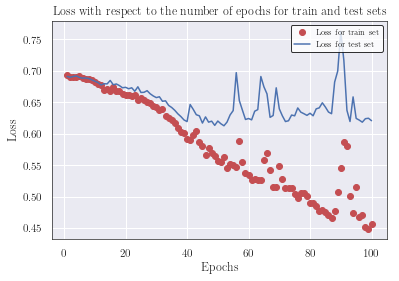

In [7]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 
from utility.visualization_utility import create_mat_plot

[latex_line, p_micro, r_micro, f1_micro, p_macro, r_macro, f1_macro, history]=FileUtility.load_obj('../../crohns_disease/results/DNNclassifier/results_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.65.pickle')
(loss_values, val_loss_values, epochs)=history
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams["axes.edgecolor"] = "black"
matplotlib.rcParams["axes.linewidth"] = 0.6
plt.rc('text', usetex=True)
plt.plot(epochs, loss_values, 'ro', label='Loss for train set')
plt.plot(epochs, val_loss_values, 'b', label='Loss for test set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=1, prop={'size': 8},ncol=1, edgecolor='black', facecolor='white', frameon=True)
plt.title('Loss with respect to the number of epochs for train and test sets')

# Producing the activation function of the last layer

In [9]:
# CREAR E ENTRENAR O MODELO COS PESOS DO ÚLTIMO FOLD DO CV (PROXIMAMENTE: COS MELLORES)

X_new=DNNMutliclass16S.make_activation_function('../../crohns_disease/results/DNNclassifier/weights_layers_mlp_1024-0.2-512-0.2-256-0.1-128-8_0.65.pickle',X)

In [10]:
X_new.shape

(1359, 8)

## Oral bacteria

In [ ]:
# Code for classification of oral bacteria data